# Assignment_17_SVM_Salary_Data

1) Prepare a classification model using SVM for salary data

Data Description:

age -- age of a person workclass -- A work class is a grouping of work education -- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation -- occupation of an individuals relationship --
race -- Race of an Individual sex -- Gender of an Individual capitalgain -- profit received from the sale of an investment
capitalloss -- A decrease in the value of a capital asset hoursperweek -- number of hours work per week
native -- Native of an individual Salary -- salary of an individual

In [18]:
import pandas as pd

In [19]:
sal = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\SalaryData_Train(1).csv")
sal.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [20]:
sal.shape # Row and Column

(30161, 14)

In [21]:
sal.columns #Columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [22]:
sal.index #Rows

RangeIndex(start=0, stop=30161, step=1)

In [23]:
sal.info() #Checking datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [24]:
sal['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [25]:
print(sal['Salary'].unique())      
print(sal['workclass'].unique()) 
print(sal['education'].unique())
print(sal['maritalstatus'].unique())
print(sal['occupation'].unique())
print(sal['relationship'].unique())
print(sal['race'].unique())
print(sal['sex'].unique())
print(sal['native'].unique())

[' <=50K' ' >50K']
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines

In [26]:
sal.describe()  

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [27]:
sal[sal.duplicated()]    

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [28]:
sal.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


# Visualization

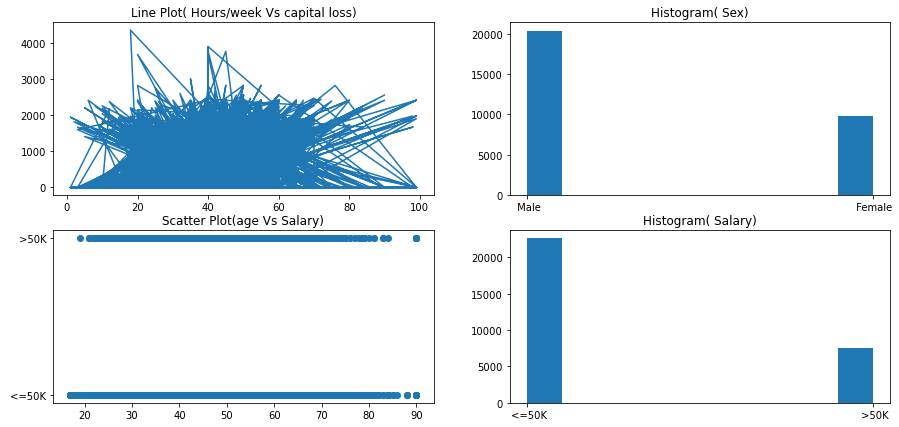

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,7))
ax[0,0].plot('hoursperweek', 'capitalloss', data = sal);ax[0,0].set_title("Line Plot( Hours/week Vs capital loss)")
ax[0,1].hist('sex', data = sal);ax[0,1].set_title("Histogram( Sex)")
ax[1,0].scatter('age', 'Salary', data = sal);ax[1,0].set_title("Scatter Plot(age Vs Salary)")
ax[1,1].hist('Salary', data = sal);ax[1,1].set_title("Histogram( Salary)")
plt.show()

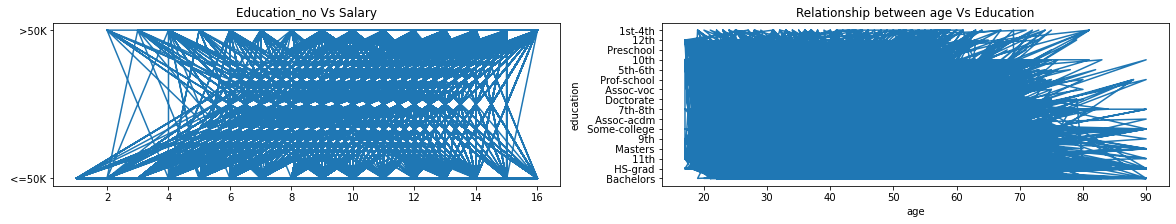

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,3))
ax[0].plot('educationno', 'Salary' , data = sal);plt.xlabel('educationno');plt.ylabel("Salary");ax[0].set_title("Education_no Vs Salary")
ax[1].plot('age', 'education' , data = sal);plt.xlabel("age");plt.ylabel("education"); ax[1].set_title("Relationship between age Vs Education")
plt.show()

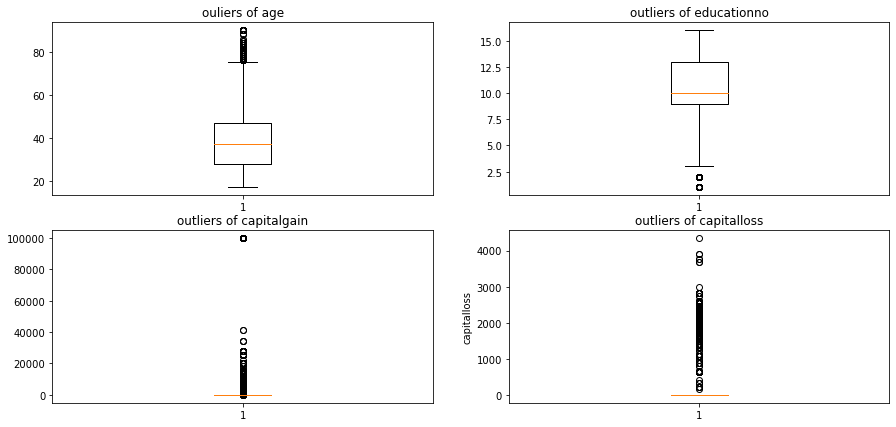

In [31]:
# Outliers detection using Boxplot

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,7))
ax[0,0].boxplot('age', data = sal);plt.ylabel("age");ax[0,0].set_title("ouliers of age")
ax[0,1].boxplot('educationno', data = sal);plt.ylabel("educationno"); ax[0,1].set_title("outliers of educationno")
ax[1,0].boxplot('capitalgain', data = sal);plt.ylabel("capitalgain");ax[1,0].set_title("outliers of capitalgain")
ax[1,1].boxplot('capitalloss', data = sal);plt.ylabel("capitalloss"); ax[1,1].set_title("outliers of capitalloss")
plt.show()

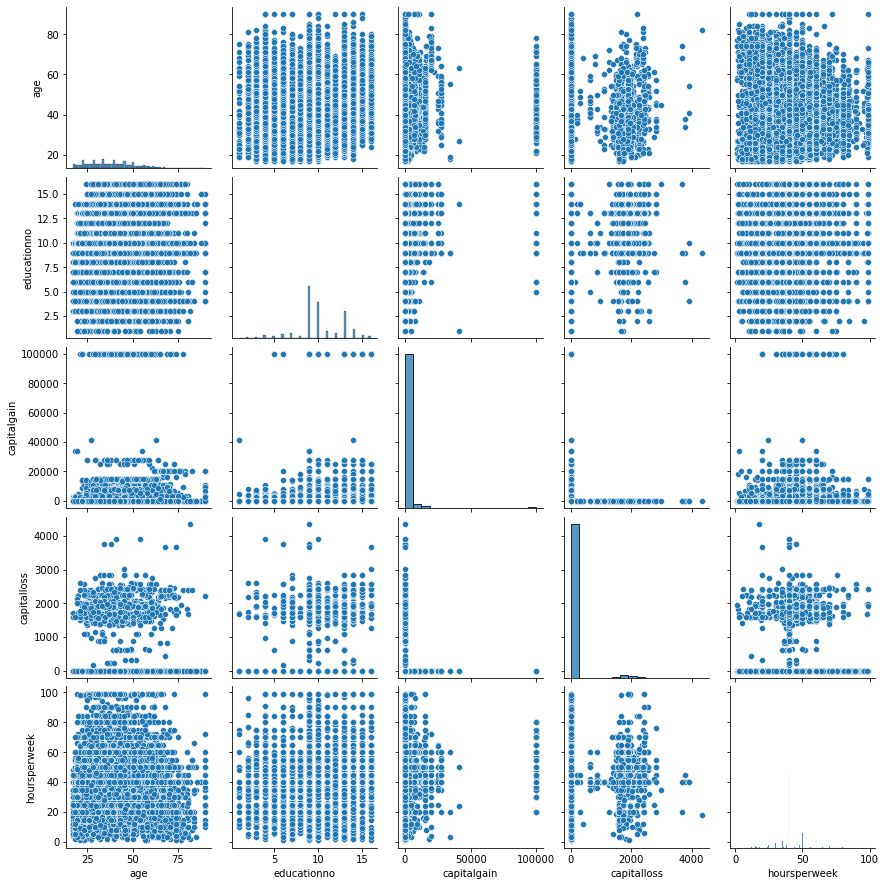

In [32]:
import seaborn as sns
sns.pairplot(sal)
plt.show()

# SVC

In [33]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [34]:
# Convert salary column string  to integer
# Label Encoding to convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sal['Salary'] = LE.fit_transform(sal['Salary'])
sal['workclass'] = LE.fit_transform(sal['workclass'])
sal['education'] = LE.fit_transform(sal['education'])
sal['maritalstatus'] = LE.fit_transform(sal['maritalstatus'])
sal['occupation'] = LE.fit_transform(sal['occupation'])
sal['relationship'] = LE.fit_transform(sal['relationship'])
sal['race'] = LE.fit_transform(sal['race'])
sal['sex'] = LE.fit_transform(sal['sex'])
sal['native'] = LE.fit_transform(sal['native'])

In [35]:
array = sal.values

In [36]:
# Take a sample of data set for training and testing.
X, Y = array[:,:-1], array[:,-1]
print(X)
print(Y)

[[39  5  9 ...  0 40 37]
 [50  4  9 ...  0 13 37]
 [38  2 11 ...  0 40 37]
 ...
 [58  2 11 ...  0 40 37]
 [22  2 11 ...  0 20 37]
 [52  3 11 ...  0 40 37]]
[0 0 0 ... 0 0 1]


In [37]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating training and test split
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)
 
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.810


# Accuracy is Very Small So We Predict Model Using SVM.

# SVM

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [40]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21112, 13), (9049, 13), (21112,), (9049,))

1) Grid Search CV

In [ ]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(x_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


2) Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(x_train, y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy is: ", acc)
confusion_matrix(y_test, y_pred)

# Salary Test Dataset

In [5]:
import pandas as pd
sal_t = pd.read_csv(r"D:\Data Science\Assignments DS\LMS Assignments DS\SalaryData_Test.csv")
sal_t.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
sal_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
# Convert salary column string  to integer
# Label Encoding to convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sal_t['Salary'] = LE.fit_transform(sal_t['Salary'])
sal_t['workclass'] = LE.fit_transform(sal_t['workclass'])
sal_t['education'] = LE.fit_transform(sal_t['education'])
sal_t['maritalstatus'] = LE.fit_transform(sal_t['maritalstatus'])
sal_t['occupation'] = LE.fit_transform(sal_t['occupation'])
sal_t['relationship'] = LE.fit_transform(sal_t['relationship'])
sal_t['race'] = LE.fit_transform(sal_t['race'])
sal_t['sex'] = LE.fit_transform(sal_t['sex'])
sal_t['native'] = LE.fit_transform(sal_t['native'])

In [10]:
array = sal_t.values

In [11]:
# Take a sample of data set for training and testing.
X, Y = array[:,:-1], array[:,-1]
print(X)
print(Y)

[[25  2  1 ...  0 40 37]
 [38  2 11 ...  0 50 37]
 [28  1  7 ...  0 40 37]
 ...
 [38  2  9 ...  0 50 37]
 [44  2  9 ...  0 40 37]
 [35  3  9 ...  0 60 37]]
[0 0 1 ... 0 0 1]


In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating training and test split
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)
 
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.812


# Accuracy is very small so we predict model using  SVM.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10542, 13), (4518, 13), (10542,), (4518,))

In [ ]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(x_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


In [ ]:
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................


In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy is: ", acc)
confusion_matrix(y_test, y_pred)

# Logistic Regression

In [ ]:
# Dividing dataset into input and output
X = sal.iloc[:,:-1]
Y = sal.iloc[:,-1]
# print(X)
# print(Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

In [ ]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [ ]:
y_pred_sal = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_sal

In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

In [ ]:
((21122+3166)/(21122+1531+4342+3166))*100

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
auc #Accuracy

# Decision Tree

Model Building, Training Testing

In [ ]:
# Splitting The data into training and testing dataset
from sklearn.model_selection import train_test-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [ ]:
# Building Decision Tree Classifier Using Entropy Criteria
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train, Y_train)

In [ ]:
model

In [ ]:
# Decision Tree Plot
from sklearn import tree
tree.plot_tree(model);

In [ ]:
Y_train.value_counts().keys()

In [ ]:
col = sal.columns
col

In [ ]:
col = (['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'])
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [ ]:
# Predicting On test Data
preds = model.predict(X_test)    # Predicting on test data set
pd.Series(preds).value_counts()     # Getting the count of each category 

In [ ]:
Y_test.value_counts()

In [ ]:
preds

In [ ]:
pd.crosstab(Y_test, preds) # getting the 2 way table to understand the correct and wrong Predictions

In [ ]:
preds, Y_test

In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score
import numpy as np
np.mean(preds == Y_test), accuracy_score(Y_test, preds)

In [ ]:
# Building Decision Tree Classifier (CART) Using Gini Criteria
from sklearn.metrics import accuracy_score
import numpy as np
np.mean(preds ==Y_test), accuracy_score(Y_test, preds)

In [ ]:
# Building Decision Tree Classifier (CART) Using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
model_gini.fit(X_train, Y_train)

In [ ]:
# Prediction and Computing the Accuracy
pred =  model.predict(X_test)
np.mean(preds == Y_test)

In [ ]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor
X_tr, X_t, Y_tr, Y_t = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_tr, Y_tr)

In [ ]:
# Find the accuracy
model.score(X_t, Y_t)

# KNN Classification

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X.shape
Y.shape


In [ ]:
kfold = Kfold(n_splits = 10)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())

Grid Search For Algorithm Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

In [ ]:
print(grid.best_score_)

# SVM_Forest_Fires

classify the Size_Categorie using SVM

month month of the year: 'jan' to 'dec' day day of the week: 'mon' to 'sun' FFMC FFMC index from the FWI system: 18.7 to 96.20 DMC DMC index from the FWI system: 1.1 to 291.3 DC DC index from the FWI system: 7.9 to 860.6 ISI ISI index from the FWI system: 0.0 to 56.10 temp temperature in Celsius degrees: 2.2 to 33.30 RH relative humidity in %: 15.0 to 100 wind wind speed in km/h: 0.40 to 9.40 rain outside rain in mm/m2 : 0.0 to 6.4 Size_Categorie the burned area of the forest ( Small , Large)

In [ ]:
 import pandas as pd

In [ ]:
ffire = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\forestfires (1).csv")

In [ ]:
ffire.head()

# EDA


In [ ]:
ffire.shape

In [ ]:
ffire.index

In [ ]:
ffire.info()

In [ ]:
ffire.columns

In [ ]:
# Rename Columns
ffire.columns = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'size']

In [ ]:
ffire.columns

In [ ]:
ffire['size'].value_counts()

In [ ]:
ffire.describe()

In [ ]:
ffire.corr()

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))
ax[0,0].hist('month', data = ffire);ax[0,0].set_title("Histogram(Temp)")
ax[0,1].plot('month', 'temp', data = ffire);ax[0,1].set_title("Line Plot(Month-temp)")
ax[0,2].scatter('temp','rain', data = ffire);ax[0,2].set_title("Scatter Plot(temp-rain)")
ax[1,0].boxplot('DMC', data= ffire);ax[1,0].set_title("Boxplot(DMC)")
ax[1,1].violinplot('FFMC', data = ffire);ax[1,1].set_title("Violin Plot(FFMC)")
ax[1,2].bar( ffire['day'],ffire['DC']);ax[1,2].set_title("Bar Plot(day-DC)")
ax[2,0].bar('day','rain', data = ffire ); ax[2,0].set_title("Bar Plot(day-rain)")
ax[2,1].scatter('RH','wind', data = ffire);ax[2,1].set_title('Scatter Plot(RD-wind)')
ax[2,2].plot('dec', 'wind', data = ffire);ax[2,2].set_title("Line Plot(dec-wind)")
plt.show()

In [ ]:
plt.subplot(1,2,1)
sns.swarmplot(x='temp', data = ffire);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot(x= 'wind', data = ffire); plt.title("Strip Plot")
plt.show()

In [ ]:
sns.jointplot(x='FFMC', y='DC', data = ffire, kind ='kde')
plt.title("Density Plot", size = 20)
plt.show()

In [ ]:
# Boxplot For Outlier Detection
plt.boxplot('wind', data= ffire); plt.title("Boxplot (Wind)")
plt.show()

In [ ]:
# plot pairplot for visualization all in one.
sns.pairplot(ffire, hue = 'size_category')
plt.show()

In [ ]:
ffire[ffire.duplicated()]

In [ ]:
ffire.isna().sum()

# SVC

In [ ]:
ffire.info()

In [ ]:
# Convert salary Column String To Integer
# Label Encoding To Convert Categorical Data Into Numeric
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
ffire['size'] = LE.fit_transform(ffire['size'])

In [ ]:
# Take A sample of Data set for Training and Testing
# Dividing Dataset Into Input and Output
X , Y = ffire.iloc[:,2:-1], ffire.iloc[:,-1]
print(X)
print(Y)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating training and test split
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)
 
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# Accuracy Is Very Small So We Predict Model Using SVM.

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearcHCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

1) Grid Search CV

In [ ]:
SVMC = SVC(random_state = 42)
svc_param_grid = {'kernel' : ['rbf', 'sigmoid', 'poly', 'linear'], 'gamma': [1,0.1,0.01,0.001], 'C': [1000,100,10,1], 'tol': [0.001,0.0008,0.0009,0.0011]}
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train, Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

In [ ]:
# Or 2) Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
# we already Divided dataset into input and output(i..e. kodel building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

In [ ]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Predict for X Dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [ ]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_ffire

In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

In [ ]:
((139+377)/(139+0+1+377))*100

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred)

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1],[0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
auc #Accuracy

# Decision Tree

Model Building, training testing

In [ ]:
# Splitting data Into Training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [ ]:
# Building Decision Tree Classifier Using Entropy Criteria
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train, Y_train)

In [ ]:
model

In [ ]:
# Decision Tree Plot
from sklearn import tree
tree.plot_tree(model);

In [ ]:
Y_train.value_counts().keys()

In [ ]:
col = ffire.columns
col

In [ ]:
col = (['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'])
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [ ]:
# Predicting on test data
preds = model.predict(X_test)    # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category 

In [ ]:
Y_test.value_counts()

In [ ]:
preds

In [ ]:
pd.crosstab(Y_test, preds)      # Getting the 2 way table to understand the correct and wrong predictions

In [ ]:
preds, Y_test

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np
np.mean(preds == Y_test), accuracy_score(Y_test, preds)

In [ ]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
model_gini.fit(X_train, Y_train)

In [ ]:
# Prediction and Computing the accuracy
pred = model.predict(X_test)
np.mean(preds == Y_test)

In [ ]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

In [ ]:
# Find the accuracy
model.score(X_test, Y_test)

# KNN Classification

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kfold = KFold(n_splits = 10)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean())

In [ ]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X, Y)

In [ ]:
print(grid.best_score_)